# K Means Clustering Project
Usually, when dealing with an unsupervised learning problem, it's difficult to get a good measurement of how well the model performed. For this project, we will use data from the UCI archive based off of red and white wines (this is a very commonly used dataset in ML)

We will then add a label to the combined dataset. We'll bring this label back later to see how well we can cluster the wine into groups

### Get the Data
__Download the two data csv files from the UCI repo or just use the downloaded csv files__

__Use read.csv to open both datasets and set them as df1 and df2.__ 

In [1]:
df1 <- read.csv("winequality-red.csv", sep = ";")
df2 <- read.csv("winequality-white.csv", sep = ";")

__Now add a label column to both df1 and df2 indicating a label 'red' or 'white'__

In [2]:
df1$label <- "red"
df2$label <- "white"

__Check the head of df1 and df2__

In [5]:
head(df1)
head(df2)
str(df1)
str(df2)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,red


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6,white
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6,white
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,white
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,white
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,white
6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,white


'data.frame':	1599 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ label               : chr  "red" "red" "red" "red" ...
'data.frame':	4898 obs. o

__Combine df1 and df2 int a single dataframe called wine.__

In [4]:
wine  <- rbind(df1,df2)
wine$label <- sapply(wine$label,factor)

str(wine)

'data.frame':	6497 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ label               : Factor w/ 2 levels "red","white": 1 1 1 1 1 1 1 1 1 1 ...


## Exploratory Data Analysis

__Create a Histogram of residual sugar from the wine data. Color by red and white wines.__

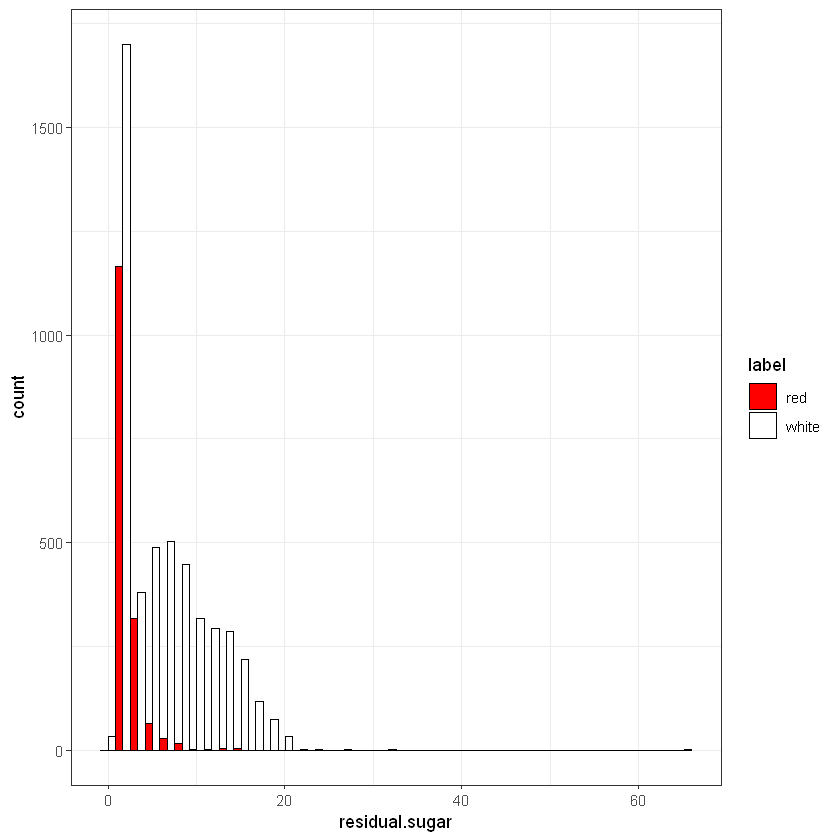

In [63]:
library(ggplot2)

ggplot(data = wine , aes(x = residual.sugar)) + 
geom_histogram(aes(fill = label), 
               position = "dodge", 
               bins = 40, 
               color = 'black') +
scale_fill_manual(values = c('red','white'))+
theme_bw()

__Create a histogram of citric.acid from the wine data.__ 

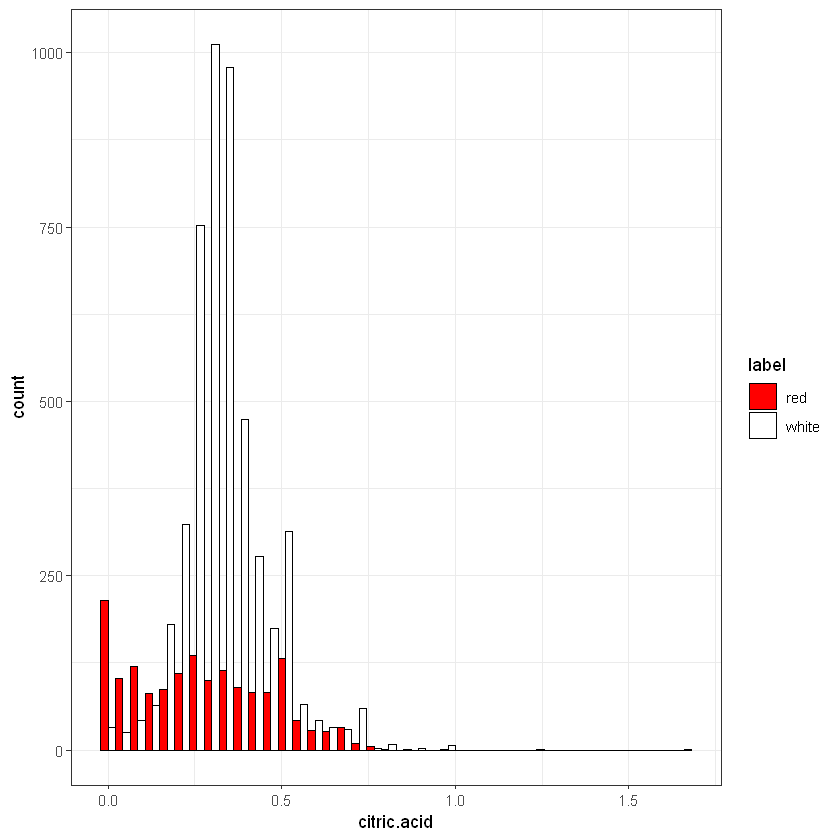

In [64]:
ggplot(data = wine , aes(x = citric.acid)) + 
geom_histogram(aes(fill = label), 
               position = "dodge", 
               bins = 40, 
               color = 'black') +
scale_fill_manual(values = c('red','white'))+
theme_bw()

__Create a histogram of alcohol from wine data. Coor by red and white wines.__


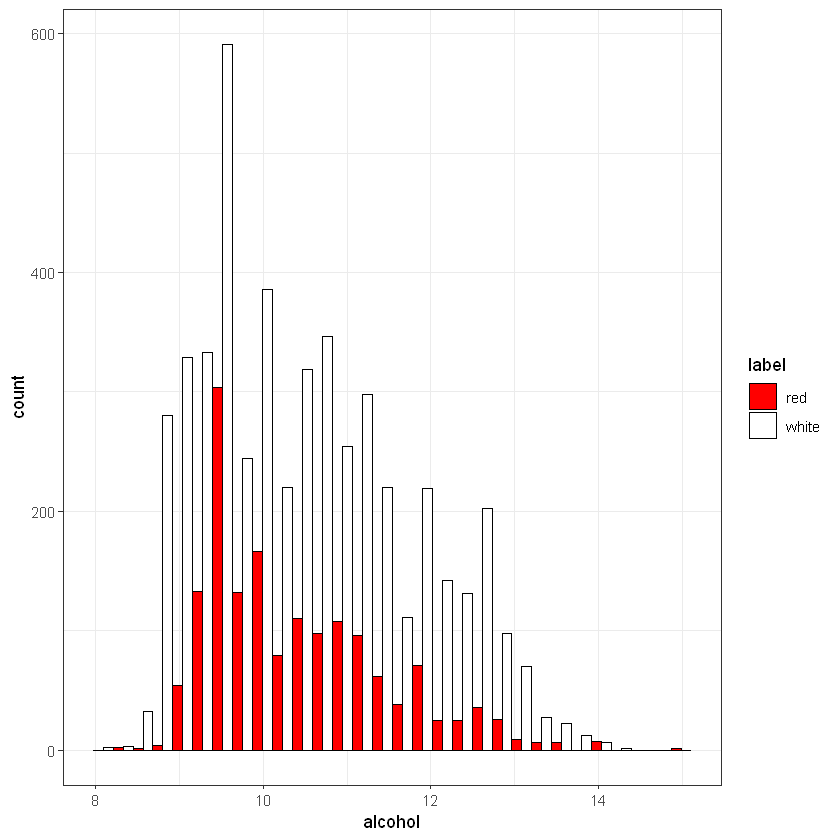

In [67]:

ggplot(data = wine , aes(x = alcohol)) + 
geom_histogram(aes(fill = label), 
               position = "dodge", 
               bins = 30, 
               color = 'black') +
scale_fill_manual(values = c('red','white'))+
theme_bw()

__Create a scatterplot of residual.sugar versus citric.acid.__

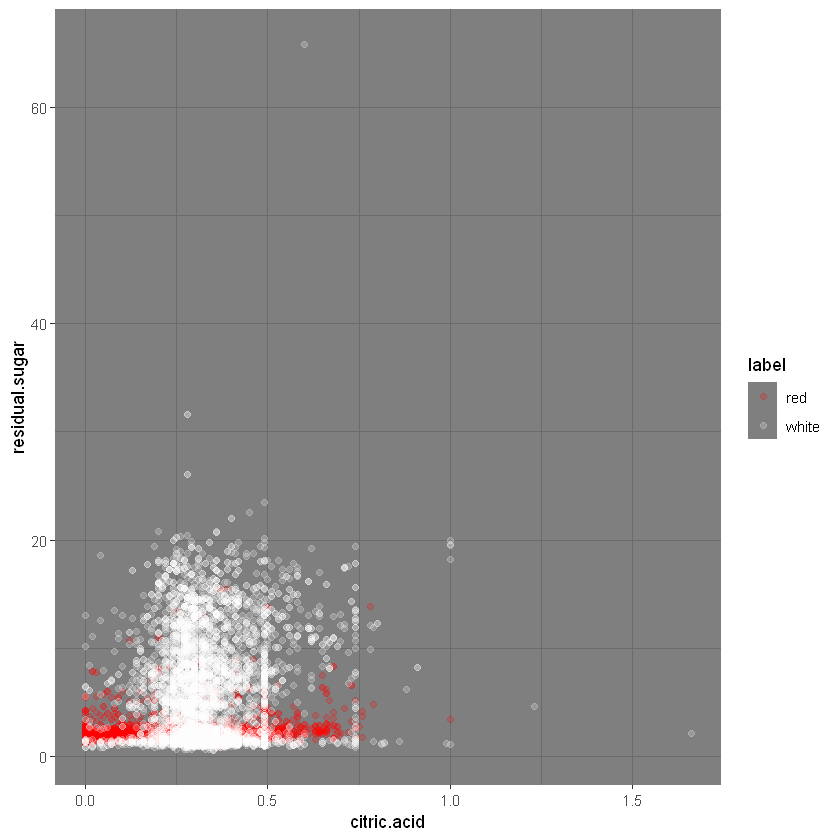

In [75]:
ggplot(wine,aes(x=citric.acid,y=residual.sugar)) + 
geom_point(aes(color=label),alpha=0.2) + 
scale_color_manual(values = c('red','white')) +
theme_dark()

__Create a scatterplot of volatile.acidity verses residual.sugar__

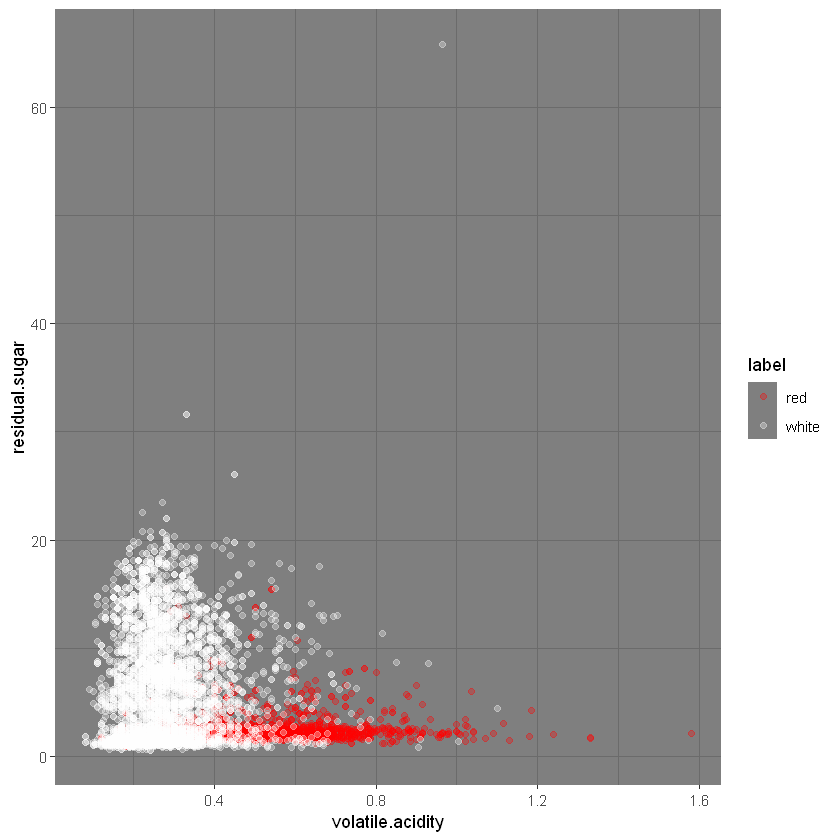

In [77]:
ggplot(data = wine , aes(x = volatile.acidity, y = residual.sugar)) + 
geom_point(aes(color = label), alpha= 0.3) +
scale_color_manual(values = c('red','white')) +
theme_dark()

### Building the Model
__Grab the wine data without the label and call it clus.data__

In [39]:
library(dplyr)
clus.data <- select(wine, -label)

__Check the head of clus.data.__

In [40]:
head(clus.data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


__Call the kmeans function on clus.data and assign the results to wine.cluster__

In [42]:
wine.cluster <- kmeans(clus.data, 2)

__Print out the wine.cluster Cluster Means and explore the information__

In [45]:
print(wine.cluster$centers)

  fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1      7.619044        0.4079451   0.2911080       3.082690 0.0656846
2      6.904698        0.2871364   0.3398094       7.259286 0.0486092
  free.sulfur.dioxide total.sulfur.dioxide   density       pH sulphates
1            18.43735             63.54832 0.9945680 3.255147 0.5718655
2            39.82503            155.90101 0.9947956 3.190308 0.5000354
   alcohol  quality
1 10.79529 5.809204
2 10.25832 5.825436


## Evaluating the Clusters
Again, you normally won't have the luxury of having labelled data when using k means, but let's go ahead and see how we did!

__Use the table() function to compare your cluster results to the real results. Which is easier to correctly group? Red, white or both wines?__


In [48]:
table(wine.cluster$cluster, wine$label)

   
     red white
  1 1515  1310
  2   84  3588